In [1]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandasql import sqldf

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import pmdarima as pm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [4]:
data=pd.read_csv('Amazon Sale Report.csv')
data.head()
column_lst=data.columns.tolist()
print(column_lst)

['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


C:\Users\acer\AppData\Local\Temp\ipykernel_11296\527545752.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('Amazon Sale Report.csv')


In [5]:
data1=data.drop(['Sales Channel ','index','ship-service-level', 'Style','Category','currency','Size','SKU','Fulfilment', 'ASIN', 'Courier Status','ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by','Unnamed: 22'],axis=1)

In [6]:
data2=data1[data1.Status != 'Cancelled']

In [7]:
print(data2)

                   Order ID      Date                        Status  Qty  \
1       171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer    1   
2       404-0687676-7273146  04-30-22                       Shipped    1   
4       407-1069790-7240320  04-30-22                       Shipped    1   
5       404-1490984-4578765  04-30-22                       Shipped    1   
6       408-5748499-6859555  04-30-22                       Shipped    1   
...                     ...       ...                           ...  ...   
128970  406-6001380-7673107  05-31-22                       Shipped    1   
128971  402-9551604-7544318  05-31-22                       Shipped    1   
128972  407-9547469-3152358  05-31-22                       Shipped    1   
128973  402-6184140-0545956  05-31-22                       Shipped    1   
128974  408-7436540-8728312  05-31-22                       Shipped    1   

        Amount  
1        406.0  
2        329.0  
4        574.0  
5        824.0  
6 

In [8]:
from pylab import rcParams

In [9]:
data3=data2.groupby(data2['Date'])['Qty'].agg(['sum'])
print(data3)

           sum
Date          
03-31-22   152
04-01-22  1237
04-02-22  1302
04-03-22  1453
04-04-22  1271
...        ...
06-25-22   898
06-26-22  1055
06-27-22   972
06-28-22  1054
06-29-22   627

[91 rows x 1 columns]


<Axes: xlabel='Date'>

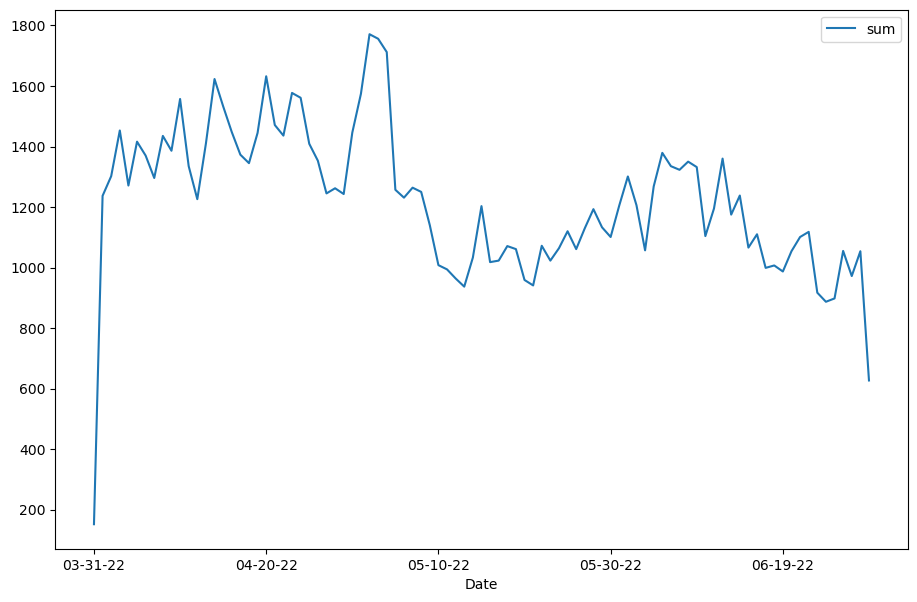

In [10]:
rcParams['figure.figsize']=11,7
data3.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data3)
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
print(test_result)

(-5.015389518436202, 2.0688243915092404e-05, 0, 90, {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}, 976.4744626112599)


In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

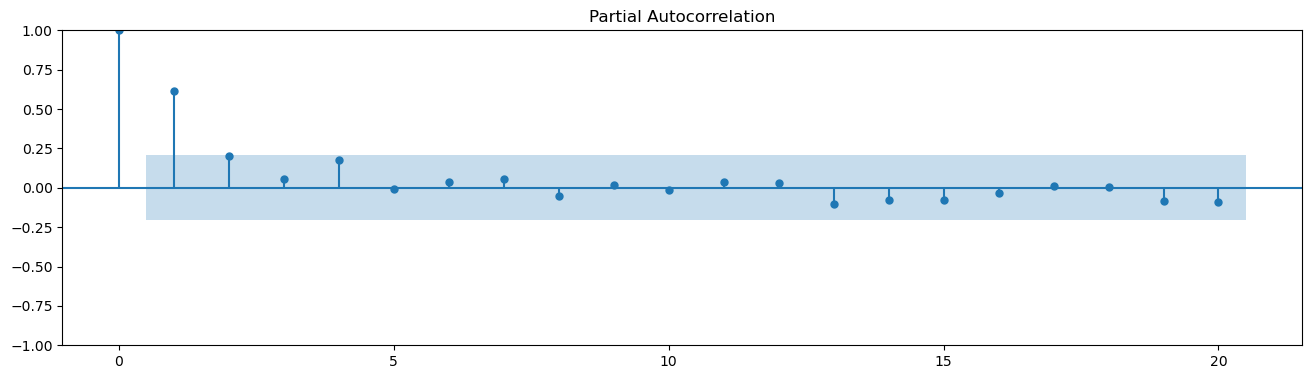

In [13]:
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data3,ax=ax1)

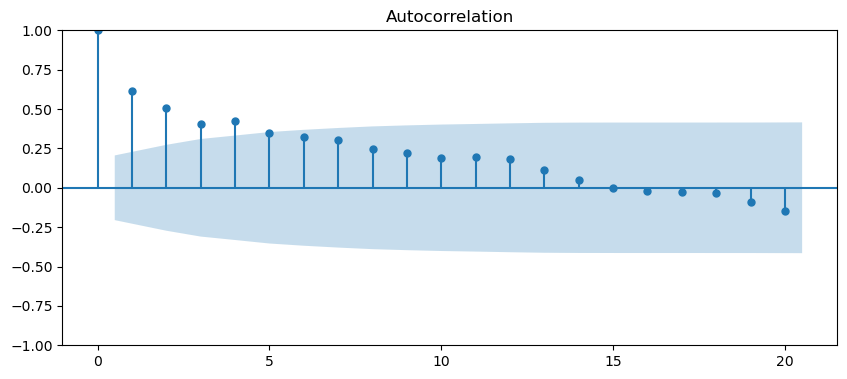

In [14]:
fig = plt.figure(figsize=(10,9))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(data3,ax=ax2)

In [3]:
from statsmodels.tsa.arima.model import ARIMA
X = data3.values
size = int(len(X) * 0.52)
train, test = X[0:size], X[size:len(X)]
train_lst = [x for x in train]
model = ARIMA(train_lst, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

NameError: name 'data3' is not defined

In [41]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
data3.dropna()
X = data3.values
size = int(len(X) * 0.52)
train, test = X[0:size], X[size:len(X)]
train_lst = [x for x in train]
print(model_fit.summary())
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(train_lst, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    train_lst.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

C:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\acer\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=1018.686947, expected=1023.000000
predicted=1023.848993, expected=1071.000000
predicted=1070.535325, expected=1061.000000
predicted=1061.173136, expected=959.000000
predicted=963.066853, expected=941.000000
predicted=945.539483, expected=1072.000000
predicted=1071.997196, expected=1023.000000
predicted=1023.017454, expected=1064.000000
predicted=1064.028882, expected=1120.000000
predicted=1120.036818, expected=1061.000000
predicted=1061.035083, expected=1130.000000
predicted=1130.033425, expected=1193.000000
predicted=1193.029104, expected=1133.000000
predicted=1131.311148, expected=1101.000000
predicted=1101.824532, expected=1205.000000
predicted=1205.038601, expected=1301.000000
predicted=1285.424260, expected=1206.000000
predicted=1199.209979, expected=1057.000000
predicted=1063.488378, expected=1268.000000
predicted=1269.017796, expected=1379.000000
predicted=1382.847213, expected=1335.000000
predicted=1329.349278, expected=1323.000000
predicted=1328.133699, expected=1350

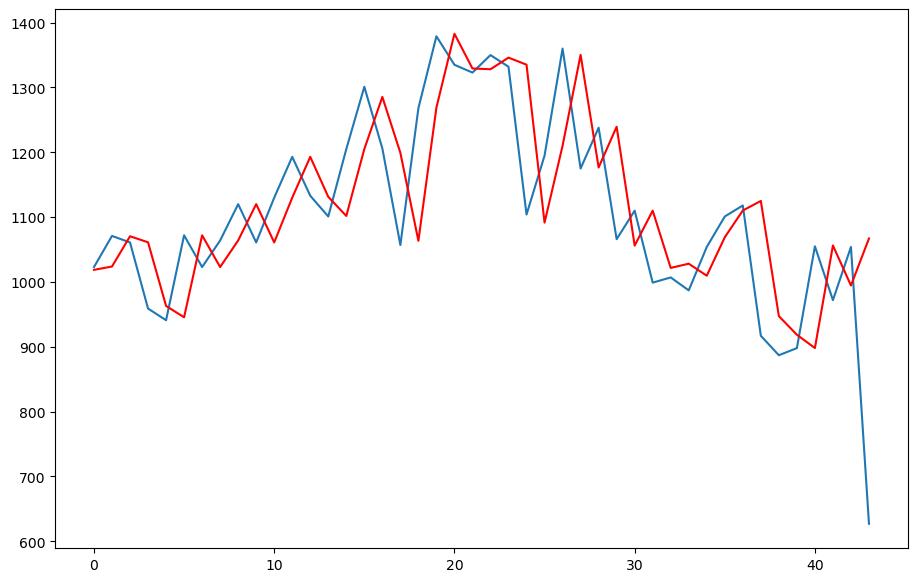

In [42]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()